In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.4-py2.py3-none-any.whl size=13431 sha256=9da71e1f84586faa9c591b89687322e880810da919119b82fbad3ea56004d415
  Stored in directory: /root/.cache/pip/wheels/63/2a/a0/7596d2e0a73cf0aeffd6f6170862c4e73f3763b7827e48691a
Successfully built pytesseract


In [ ]:
import cv2 as cv
import zipfile
import os
from PIL import Image
import pytesseract
import numpy as np
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_eye.xml")

Extracting files:

In [ ]:
import os
#os.mkdir('small_img')
local_zip = "/content/drive/My Drive/small_img.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('small_img')
zip_ref.close()


os.mkdir('images')
local_zip = "/content/drive/My Drive/images.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('images')
zip_ref.close()

**Generating a global list**

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 43 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,549 kB/s)
debconf: unable to initi

In [ ]:
#list that contains the images names
pages_list=os.listdir('small_img')

Global_list=[]
for page_name in pages_list:
    local_list=[] 
    
    #local list = [ page_name , tesseract_text ] 
    
    local_list.append(page_name)
    img = Image.open('small_img/'+page_name)
    
    local_list.append(pytesseract.image_to_string(img).replace('-\n',''))

    Global_list.append(local_list)

**Function that looks for the faces**

In [ ]:
def search(text,folder):
    for local_list in Global_list:
        if text in local_list[1]:
            print('Results found in file',local_list[0])
            
            try:
                img = Image.open(str(folder+local_list[0]))
                faces = (face_cascade.detectMultiScale(np.array(img),1.35,4)).tolist()
#                 storing the bounding boxes of all faces detected in each image of iteration
                faces_in_each = []
                
                for x,y,w,h in faces:
                    faces_in_each.append(img.crop((x,y,x+w,y+h)))
#                     modifying local data structure in each iteration to sotre PIL Image of each face
#                     display((img.crop((x,y,x+w,y+h))).resize((110,110)))
                
                contact_sheet = Image.new(img.mode, (550,110*int(np.ceil(len(faces_in_each)/5))))
#                 contact sheet modification to display each iteration's result
                x = 0
                y = 0

                for face in faces_in_each:
                    face.thumbnail((110,110))
#                     using HINT 4
                    contact_sheet.paste(face, (x, y))
                    
                    if x+110 == contact_sheet.width:
                        x=0
                        y=y+110
                    else:
                        x=x+110
                        
                display(contact_sheet)
            except:
                print('But there were no faces in that file!')

**Test:**

Results found in file a-2.png


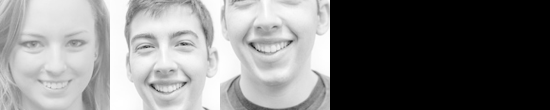

In [ ]:
search("world",'small_img/')

**Repeating the process for all the images**

*This may take about 10mins to process*

In [ ]:
#list that contains the images names
pages_list=os.listdir('images')

Global_list=[]
for page_name in pages_list:
    local_list=[] 
    
    #local list = [ page_name , tesseract_text ] 
    
    local_list.append(page_name)
    img = Image.open('images/'+page_name)
    
    local_list.append(pytesseract.image_to_string(img).replace('-\n',''))

    Global_list.append(local_list)

Results found in file utf-8''a-10.png
But there were no faces in that file!
Results found in file utf-8''a-11.png
But there were no faces in that file!
Results found in file utf-8''a-1.png


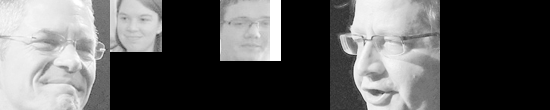

Results found in file utf-8''a-0.png


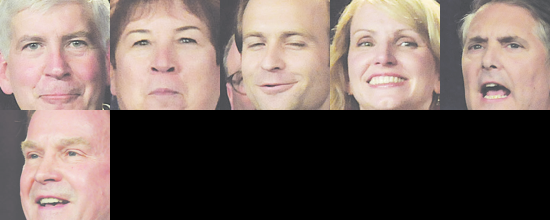

Results found in file utf-8''a-8.png
But there were no faces in that file!
Results found in file utf-8''a-3.png


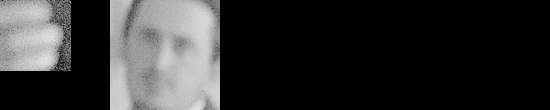

In [ ]:
search(text="state",folder='images/')